In [370]:
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns    
 

In [371]:
data = pd.read_csv('BankChurners.csv')

In [372]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [373]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

There are 10127 observations. If CLIENTNUM has the same number of unique values, we can conclude that there are no duplicate entries,

In [374]:
data['CLIENTNUM'].nunique()

10127

So all the observations are unique clients.

In [375]:
data = data.drop('CLIENTNUM',axis=1)

In [376]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

The last 2 columns are not necessary.

In [377]:
data = data[data.columns[:-2]]


# Data exploration

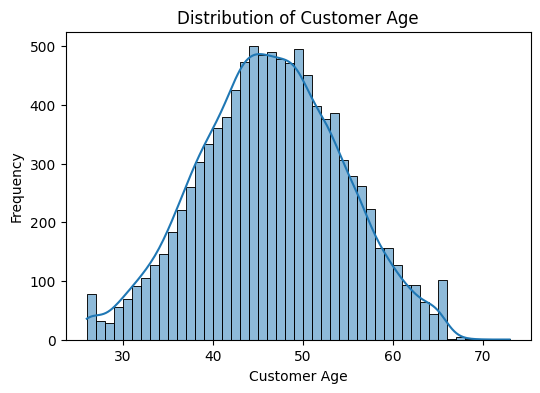

In [378]:
plt.figure(figsize=(6,4))
sns.histplot(data['Customer_Age'], kde=True)
plt.title('Distribution of Customer Age')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

Age seems to be normally distributed. Also useful to check the distribution broken down by the 2 classes of attrition.

In [379]:
data['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [380]:
data[data['Attrition_Flag']=='Existing Customer'][['Attrition_Flag','Customer_Age']]

,Attrition_Flag,Customer_Age
0,Existing Customer,45
1,Existing Customer,49
2,Existing Customer,51
3,Existing Customer,40
4,Existing Customer,40
...,...,...
10116,Existing Customer,46
10117,Existing Customer,57
10120,Existing Customer,54
10121,Existing Customer,56


In [381]:
data[data['Attrition_Flag']=='Attrited Customer'][['Attrition_Flag','Customer_Age']]

,Attrition_Flag,Customer_Age
21,Attrited Customer,62
39,Attrited Customer,66
51,Attrited Customer,54
54,Attrited Customer,56
61,Attrited Customer,48
...,...,...
10119,Attrited Customer,55
10123,Attrited Customer,41
10124,Attrited Customer,44
10125,Attrited Customer,30


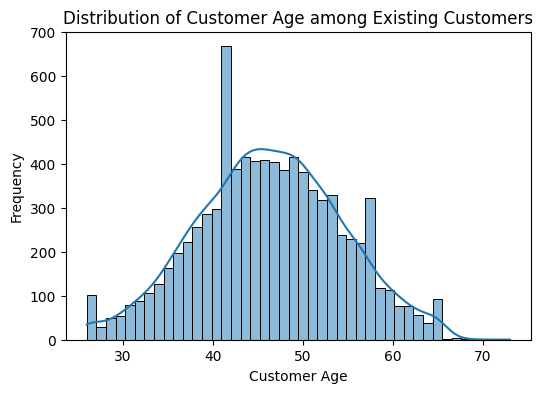

In [382]:
plt.figure(figsize=(6,4))
sns.histplot(data[data['Attrition_Flag']=='Existing Customer']['Customer_Age'], kde=True)
plt.title('Distribution of Customer Age among Existing Customers')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

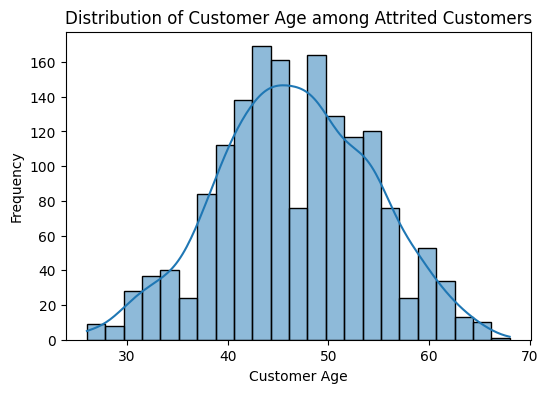

In [383]:
plt.figure(figsize=(6,4))
sns.histplot(data[data['Attrition_Flag']=='Attrited Customer']['Customer_Age'], kde=True)
plt.title('Distribution of Customer Age among Attrited Customers')
plt.xlabel('Customer Age')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Gender', ylabel='count'>

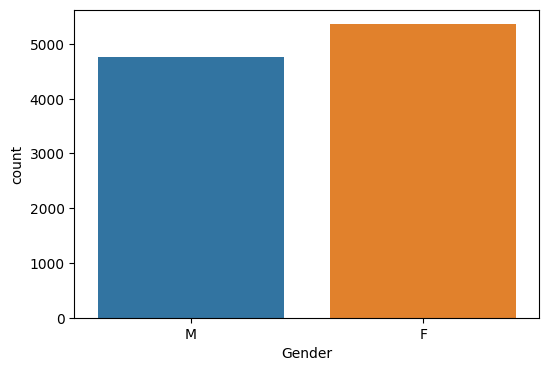

In [384]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Gender')


There are more female customers in the sample than male. But the difference is not significant.

<Axes: xlabel='Dependent_count', ylabel='count'>

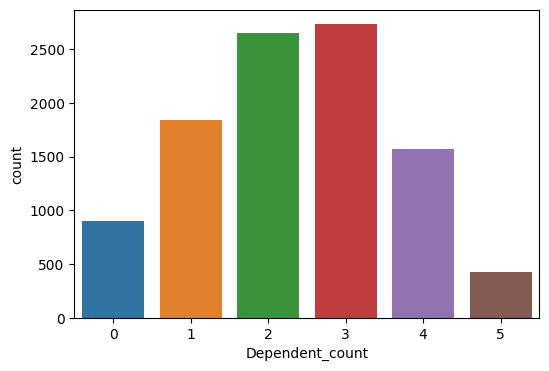

In [385]:
plt.figure(figsize=(6,4))
sns.countplot(data=data, x='Dependent_count')


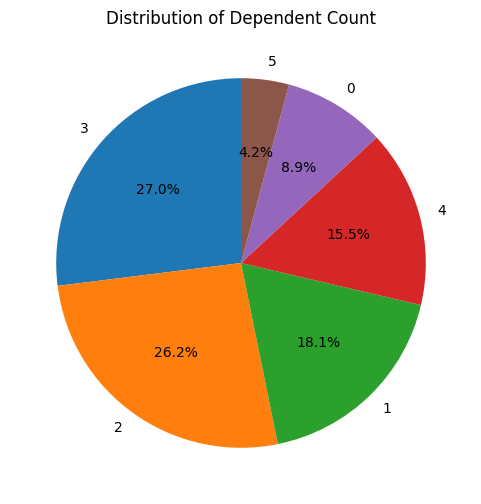

In [386]:
dependent_count_distribution = data['Dependent_count'].value_counts()
dependent_count_distribution.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6, 6))
plt.title('Distribution of Dependent Count')
plt.ylabel('')  # Hide the y-label
plt.show()

In the data, the most common number of Dependents are 3, followed by 2 and then 1. 

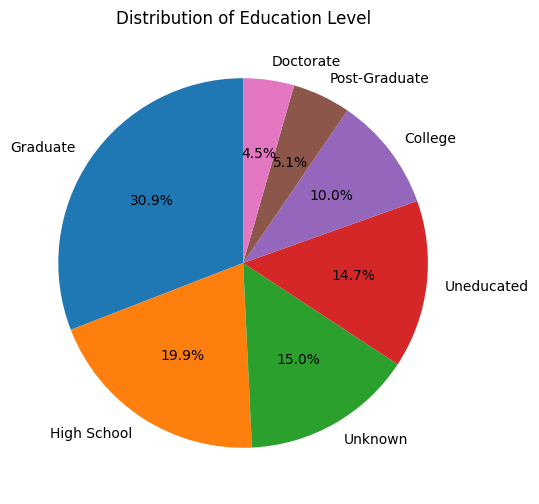

In [387]:
ed_level_distribution = data['Education_Level'].value_counts()
ed_level_distribution.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6, 6))
plt.title('Distribution of Education Level')
plt.ylabel('')  # Hide the y-label
plt.show()

Graduates make up the highest portion of customers, followed by those with a high school level of education. Education level of 15% of customers are unknown but even if they all have had no education, less than 30 (15+14.7) will fall under uneducated class. That means more than 70% of our customers are educated at least until High School level.

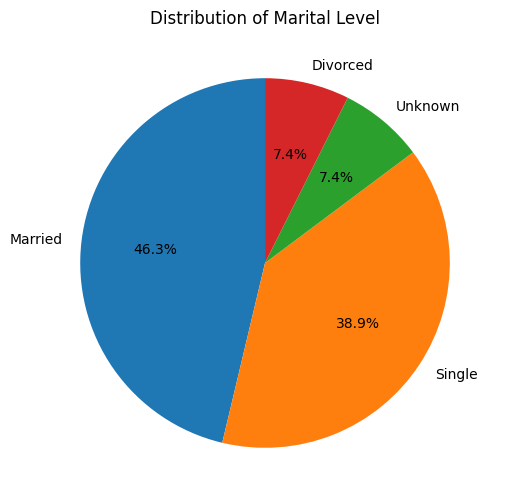

In [388]:
marriage_distribution = data['Marital_Status'].value_counts()
marriage_distribution.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6, 6))
plt.title('Distribution of Marital Level')
plt.ylabel('')  # Hide the y-label
plt.show()

Almost half of the cusotmers are married. And approximately the same Single (including Divorced).

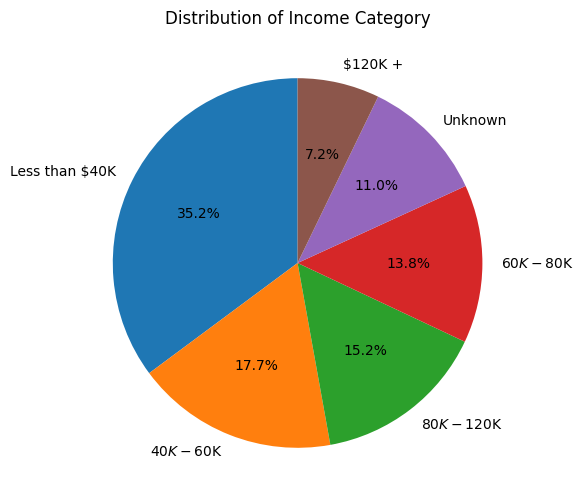

In [389]:
income_distribution = data['Income_Category'].value_counts()
income_distribution.plot.pie(autopct='%1.1f%%', startangle=90, figsize=(6, 6))
plt.title('Distribution of Income Category')
plt.ylabel('')  # Hide the y-label
plt.show()

Highest proportion of customers have income less than 40K, followed by income in the range 40K to 60K.

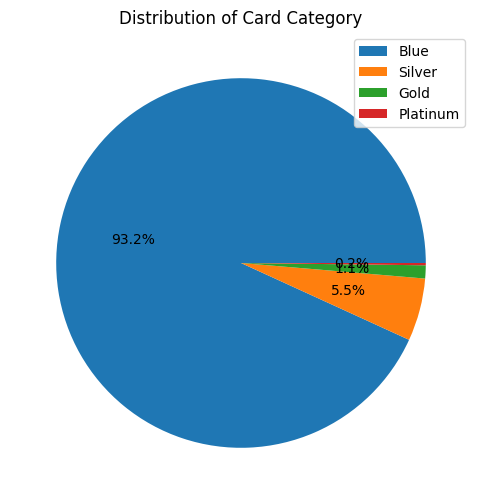

In [390]:
card_distribution = data['Card_Category'].value_counts()
card_distribution.plot.pie(autopct='%1.1f%%',labeldistance=None, figsize=(6, 6))
plt.title('Distribution of Card Category')
plt.ylabel('') 
plt.legend()   
plt.show()



Blue card is the one with the most customers, followed by Silver.

Text(0.5, 1.0, 'Months on Book')

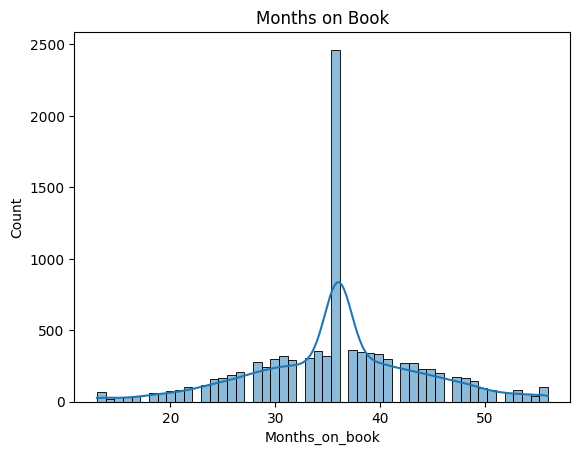

In [391]:
sns.histplot(data=data, x='Months_on_book', kde=True)
plt.title('Months on Book')

Months on book is the number of months the customer has been part of the bank. It shows a peak of 36 months (3 years) with almost 25% (2500 out of 10127) customers being in the book for this period. The distribution does not seem to be normal.

Relationship count is the number of products that the customer has purchased from the bank. 

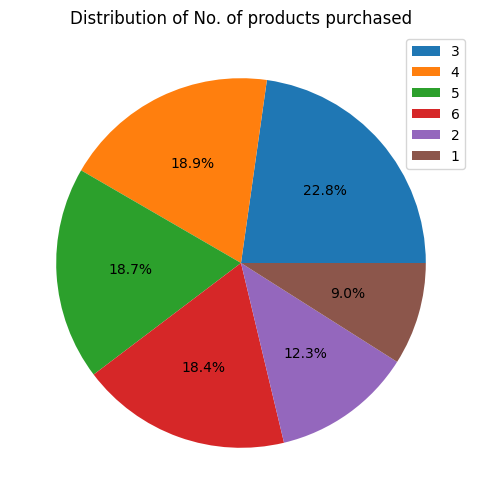

In [392]:
relcount_distribution = data['Total_Relationship_Count'].value_counts()
relcount_distribution.plot.pie(autopct='%1.1f%%',labeldistance=None, figsize=(6, 6))
plt.title('Distribution of No. of products purchased')
plt.ylabel('') 
plt.legend()   
plt.show()



Fairly even distribution with 3 products being the most common, followed by 4. Since there is not much variation in this variable, it might not be a useful predictor of churn.

Text(0.5, 1.0, 'Months inactive in the last 12 months')

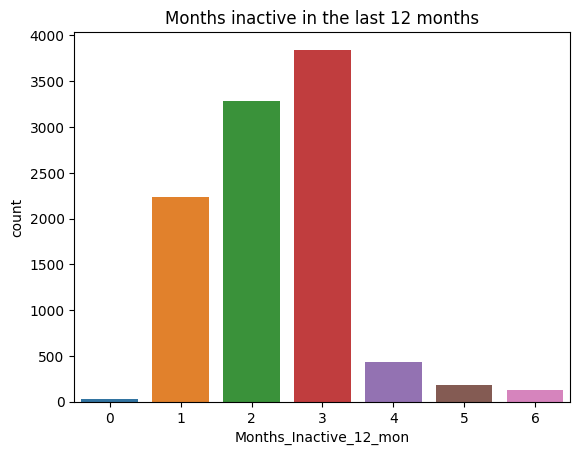

In [393]:
sns.countplot(data=data, x='Months_Inactive_12_mon')
plt.title('Months inactive in the last 12 months')

Text(0.5, 1.0, 'Contacts in the last 12 months')

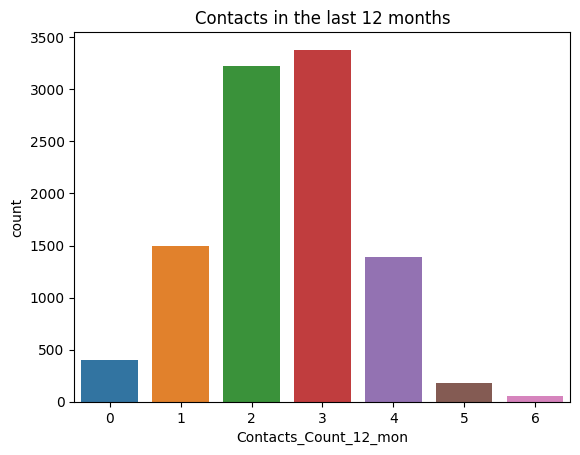

In [394]:
sns.countplot(data=data, x='Contacts_Count_12_mon')
plt.title('Contacts in the last 12 months')

Text(0.5, 1.0, 'Distribution of Credit Limit')

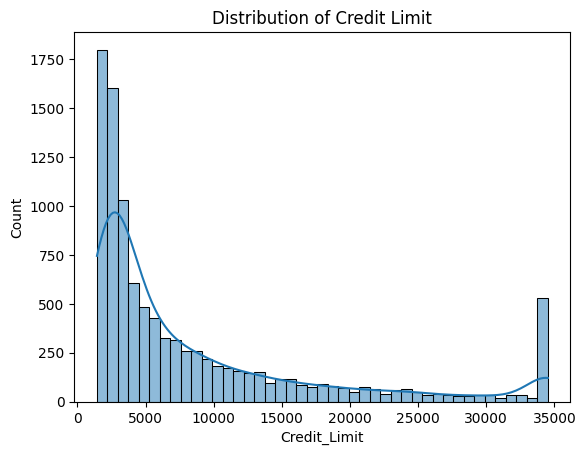

In [395]:
sns.histplot(data=data, x='Credit_Limit', kde=True)
plt.title('Distribution of Credit Limit')

Text(0.5, 1.0, 'Distribution of Total Revolving Balance')

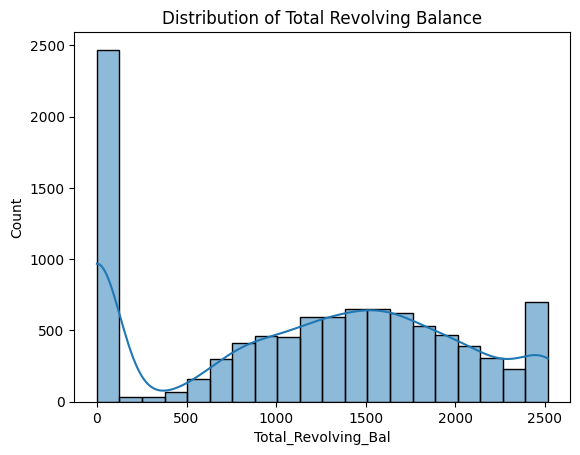

In [396]:
sns.histplot(data=data, x='Total_Revolving_Bal', kde=True)
plt.title('Distribution of Total Revolving Balance')


Text(0.5, 1.0, 'Distribution of Avg_Open_To_Buy')

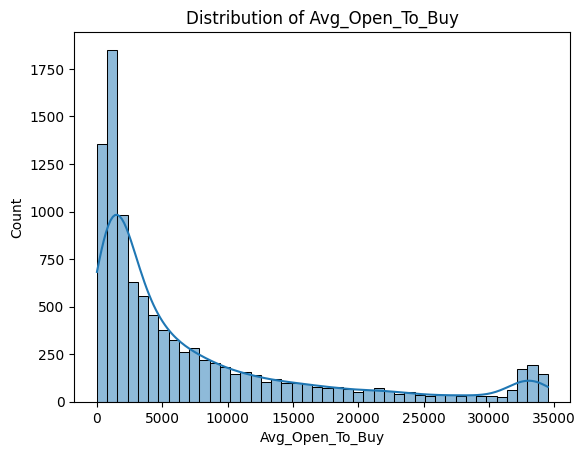

In [397]:
sns.histplot(data=data, x='Avg_Open_To_Buy', kde=True)
plt.title('Distribution of Avg_Open_To_Buy')



Text(0.5, 1.0, 'Distribution of Total_Amt_Chng_Q4_Q1')

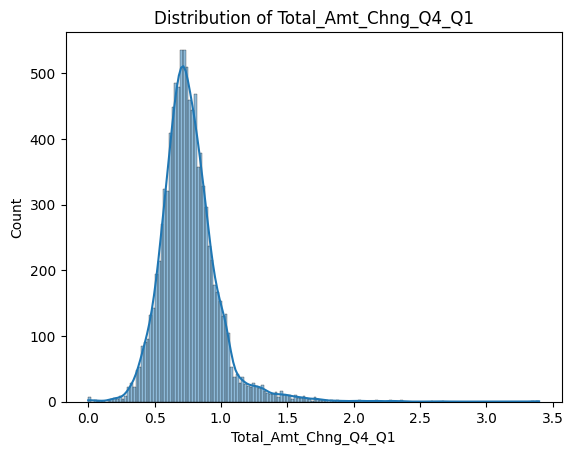

In [398]:
sns.histplot(data=data, x='Total_Amt_Chng_Q4_Q1', kde=True)
plt.title('Distribution of Total_Amt_Chng_Q4_Q1')



Text(0.5, 1.0, 'Distribution of Total transaction amounts in the last 12 months')

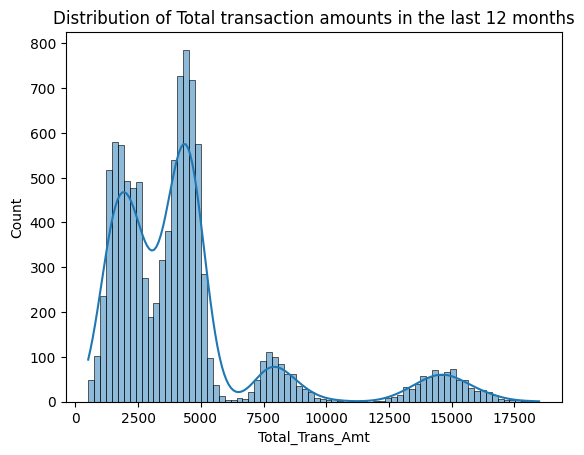

In [399]:
sns.histplot(data=data, x='Total_Trans_Amt', kde=True)
plt.title('Distribution of Total transaction amounts in the last 12 months')




Since this appears to be a multimodal distribution, there could be different distinct groups in the data. This could be a good exercise for clustering, to see what are the differences between the groups. It may not influence churn however.



Text(0.5, 1.0, 'Distribution of Total_Trans_Ct')

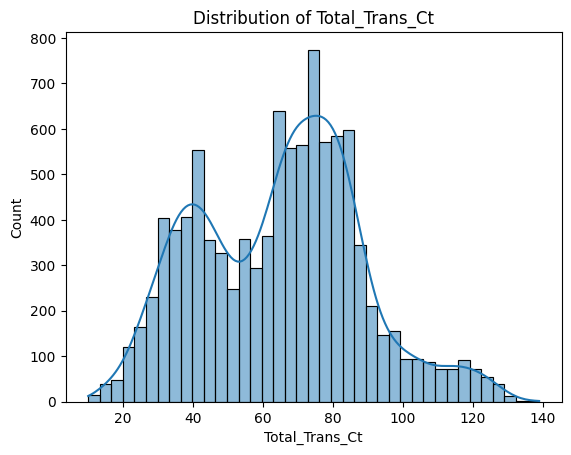

In [400]:
sns.histplot(data=data, x='Total_Trans_Ct', kde=True)
plt.title('Distribution of Total_Trans_Ct')




Text(0.5, 1.0, 'Distribution of Total_Ct_Chng_Q4_Q1')

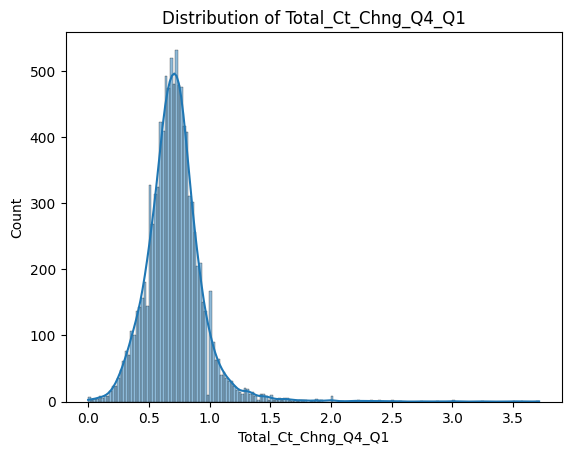

In [401]:
sns.histplot(data=data, x='Total_Ct_Chng_Q4_Q1', kde=True)
plt.title('Distribution of Total_Ct_Chng_Q4_Q1')




Text(0.5, 1.0, 'Distribution of Avg_Utilization_Ratio')

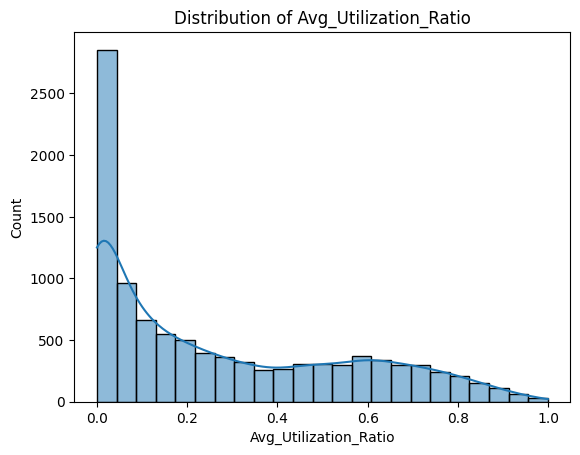

In [402]:
sns.histplot(data=data, x='Avg_Utilization_Ratio', kde=True)
plt.title('Distribution of Avg_Utilization_Ratio')




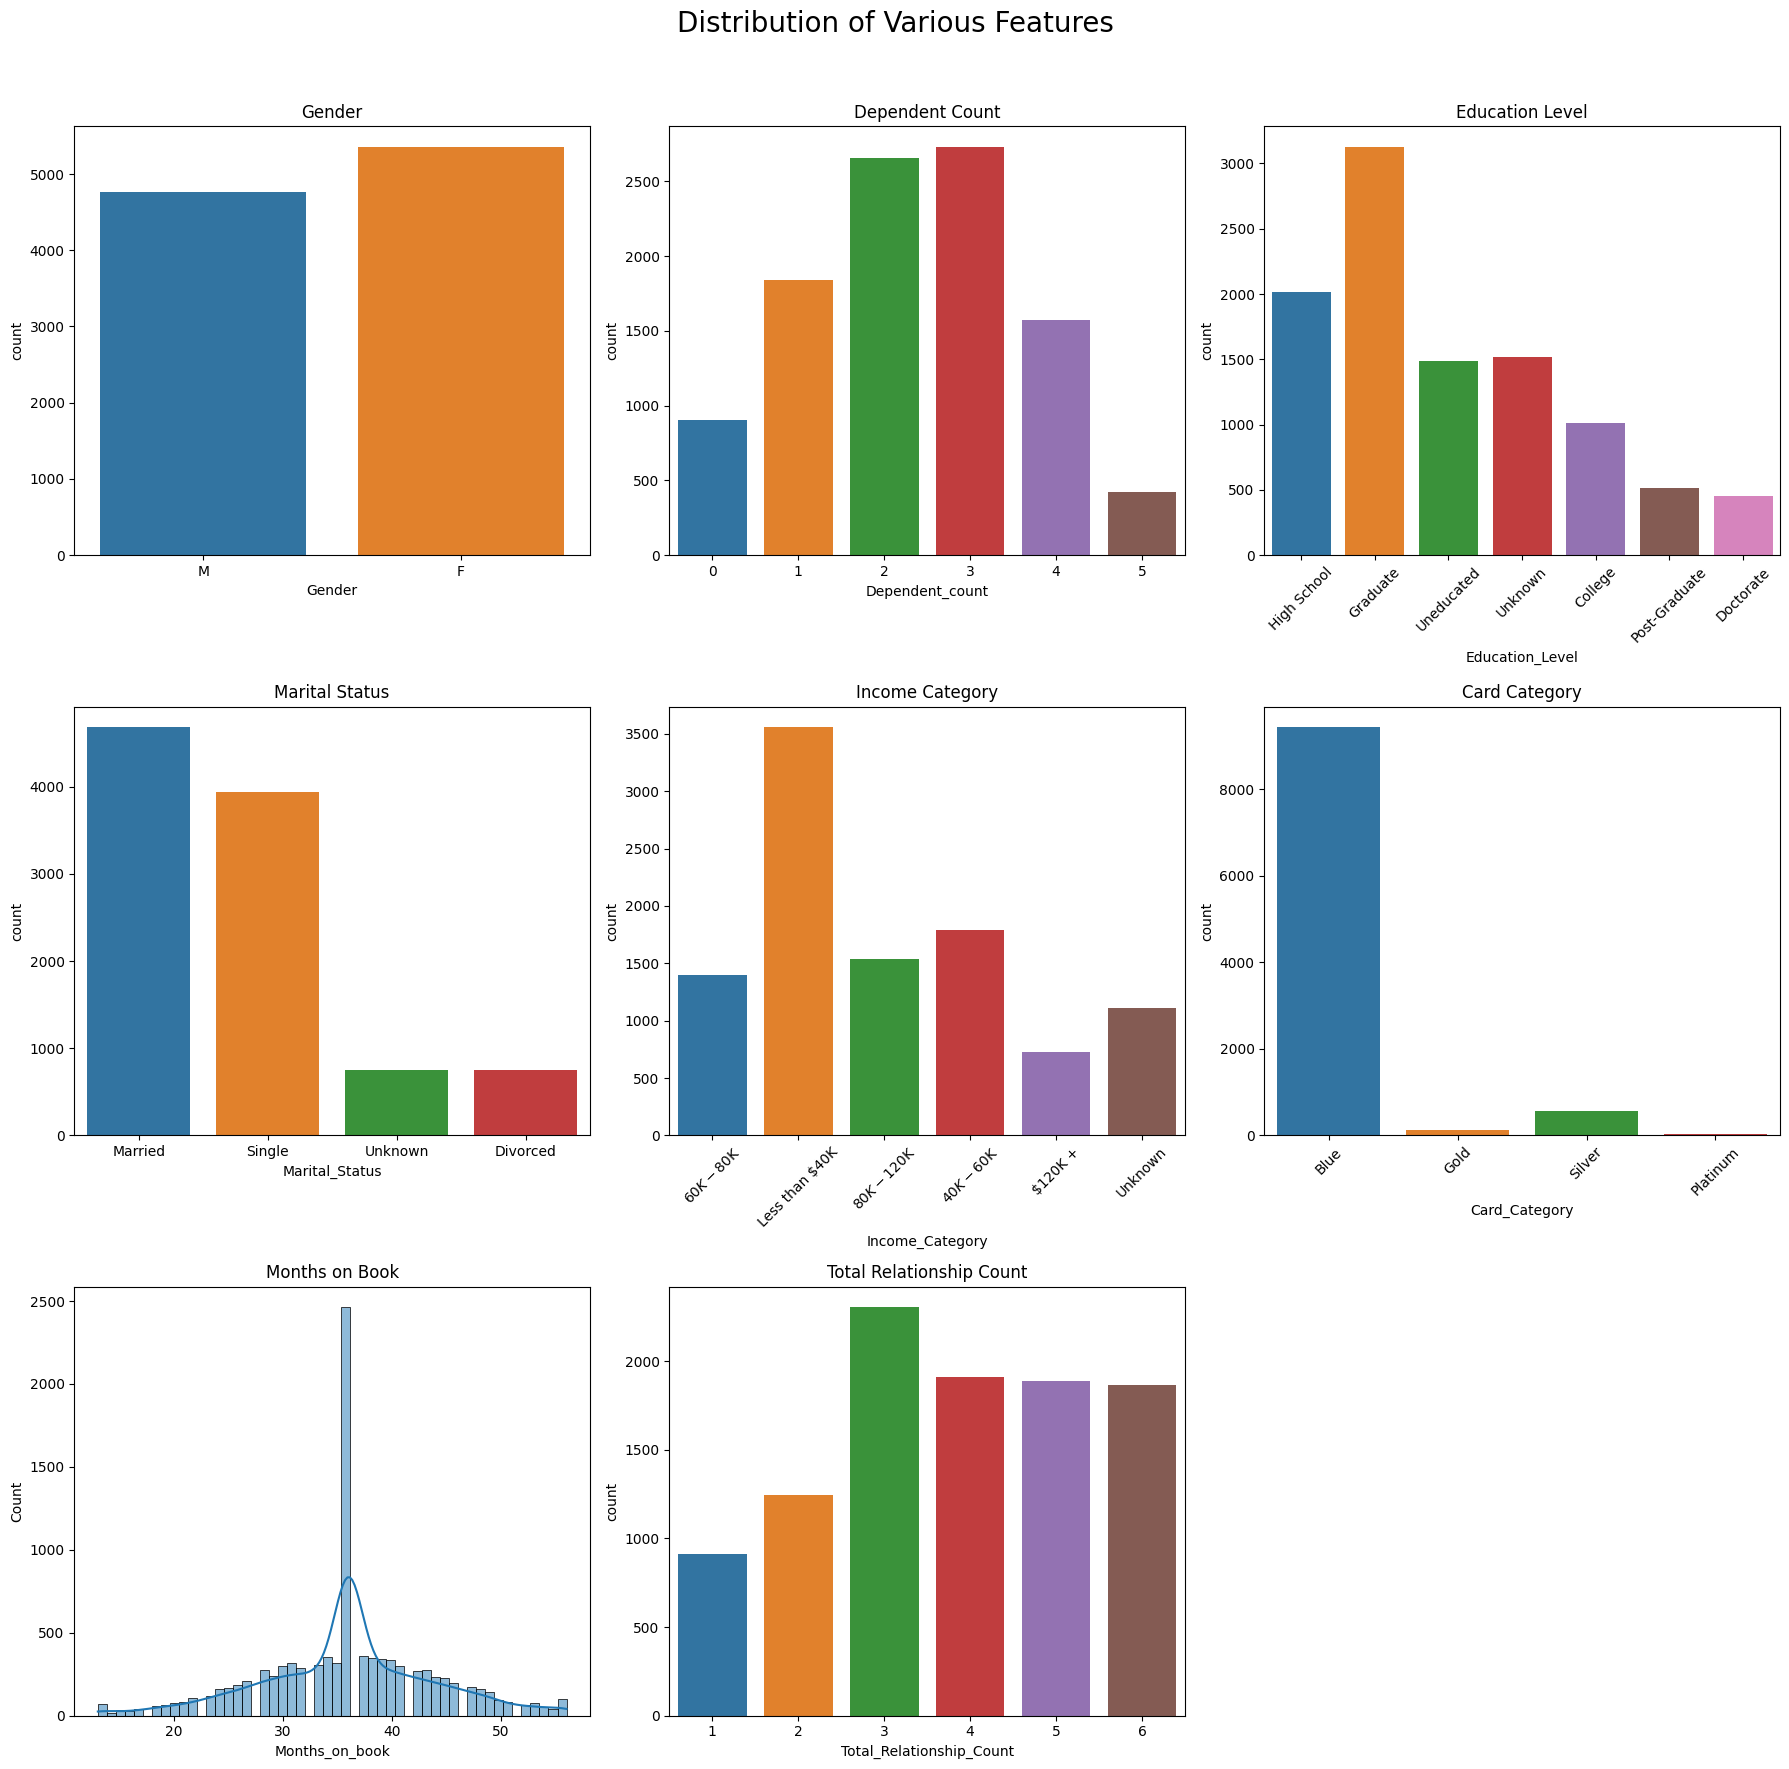

In [403]:
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
fig.suptitle('Distribution of Various Features', fontsize=20)

sns.countplot(ax=axes[0, 0], data=data, x='Gender')
axes[0, 0].set_title('Gender')

sns.countplot(ax=axes[0, 1], data=data, x='Dependent_count')
axes[0, 1].set_title('Dependent Count')

sns.countplot(ax=axes[0, 2], data=data, x='Education_Level')
axes[0, 2].set_title('Education Level')
axes[0, 2].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[1, 0], data=data, x='Marital_Status')
axes[1, 0].set_title('Marital Status')

sns.countplot(ax=axes[1, 1], data=data, x='Income_Category')
axes[1, 1].set_title('Income Category')
axes[1, 1].tick_params(axis='x', rotation=45)

sns.countplot(ax=axes[1, 2], data=data, x='Card_Category')
axes[1, 2].set_title('Card Category')
axes[1, 2].tick_params(axis='x', rotation=45)

sns.histplot(ax=axes[2, 0], data=data, x='Months_on_book', kde=True)
axes[2, 0].set_title('Months on Book')

sns.countplot(ax=axes[2, 1], data=data, x='Total_Relationship_Count')
axes[2, 1].set_title('Total Relationship Count')

# Hide the last subplot (bottom right) as we have only 8 plots
axes[2, 2].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Text(0.5, 1.0, 'Distribution of Churn/No Churn')

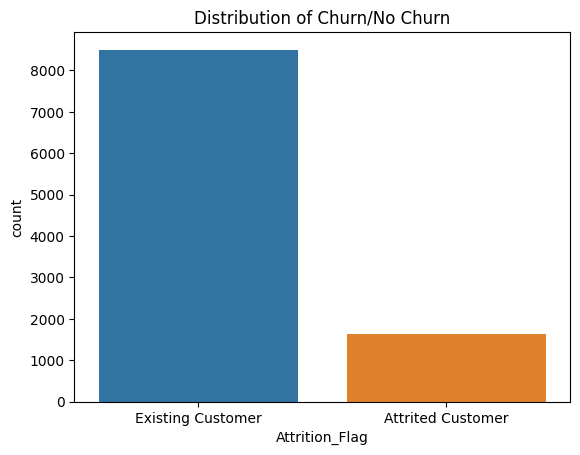

In [404]:
sns.countplot(data=data, x='Attrition_Flag')
plt.title('Distribution of Churn/No Churn')


As is clearly visible, there is an imbalance in the Attrition Flag class, which is precisely what we are trying to predict. 

Therer are various techniques to deal with such imbalanced data, like oversampling (increasing number of examples from the minority class), undersampling (decreasing instances from majority class) and SMOTE (Synthetic Minority Over-sampling Technique), which involves generating synthetic samples for the minority class. In this case, I try out SMOTE.

But before that, I need to one-hot encode the categorical variables.

In [405]:
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [406]:
data.Attrition_Flag = data.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})
data.Gender = data.Gender.replace({'F':1,'M':0})
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,0,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,0,49,1,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,0,51,0,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,0,40,1,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,0,40,0,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [407]:
data = pd.concat([data,pd.get_dummies(data['Education_Level']).drop(columns=['Unknown'])],axis=1)
data = pd.concat([data,pd.get_dummies(data['Income_Category']).drop(columns=['Unknown'])],axis=1)
data = pd.concat([data,pd.get_dummies(data['Marital_Status']).drop(columns=['Unknown'])],axis=1)
data = pd.concat([data,pd.get_dummies(data['Card_Category']).drop(columns=['Platinum'])],axis=1)
data.drop(columns = ['Education_Level','Income_Category','Marital_Status','Card_Category'],inplace=True)
data.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,0,45,0,3,39,5,1,3,12691.0,777,...,0,1,0,0,0,1,0,1,0,0
1,0,49,1,5,44,6,1,2,8256.0,864,...,0,0,0,1,0,0,1,1,0,0
2,0,51,0,3,36,4,1,0,3418.0,0,...,0,0,1,0,0,1,0,1,0,0
3,0,40,1,4,34,3,4,1,3313.0,2517,...,0,0,0,1,0,0,0,1,0,0
4,0,40,0,3,21,5,1,0,4716.0,0,...,0,1,0,0,0,1,0,1,0,0


In [408]:
import plotly.express as px
import pandas as pd

In [409]:
corr = data.corr()

fig = px.imshow(corr, text_auto=False, aspect="auto", height=800)

fig.update_traces(hovertemplate='Correlation: %{z:.2f}')

fig.update_layout(xaxis_side="top")

fig.show()

The only major correlations (above 0.5 in positive or negative direction) are 

- Customer_Age and Months_on_book (0.79) : this makes sense as older customers likely have been with the bank longer
- Credit_limit and Avg_Open_To_Buy (1): Avg_Open_To_Buy is derived directly from Credit_limit (Credit_limit - balance), so they are perfectly correlated. One of these can be dropped. 
- Total_Transaction_Amt and Total_Transaction_Ct (0.81): More transactions typically lead to higher total transaction amounts
- Total_Revolving_Bal and Avg_Utilization_Ratio (0.62): Higher revolving balances increase credit utilisation
- Gender and Less than $40K (0.58): Possibly one gender is more likely to earn less than 40K

Negatively correlated:
- Avg_Open_To_Buy and Avg_Utilization_Ratio (-0.54): Higher utilisation reduces available credit  
- Credit_Limit and Blue (-0.52): "Blue" (e.g., a card type) might be associated with lower credit limits
- Avg_Open_To_Buy and Blue (-0.51): Similar to above, "Blue" may correlate with lower available credit
- Married and Single (-0.74): These are mostly mutually exclusive categories but maybe not perfectly correlated due to the other categories like Divorced
- Blue and Silver (-0.89): Likely mutually exclusive card types or tiers



In [410]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

In [411]:
oversample = SMOTE()
X, y = oversample.fit_resample(data[data.columns[1:]], data[data.columns[0]])
upsampled = X.assign(Churn = y)


In [412]:
X.head()


,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,45,0,3,39,5,1,3,12691.0,777,11914.0,...,0,1,0,0,0,1,0,1,0,0
1,49,1,5,44,6,1,2,8256.0,864,7392.0,...,0,0,0,1,0,0,1,1,0,0
2,51,0,3,36,4,1,0,3418.0,0,3418.0,...,0,0,1,0,0,1,0,1,0,0
3,40,1,4,34,3,4,1,3313.0,2517,796.0,...,0,0,0,1,0,0,0,1,0,0
4,40,0,3,21,5,1,0,4716.0,0,4716.0,...,0,1,0,0,0,1,0,1,0,0


In [413]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Attrition_Flag, dtype: int64

In [414]:
upsampled.head()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver,Churn
0,45,0,3,39,5,1,3,12691.0,777,11914.0,...,1,0,0,0,1,0,1,0,0,0
1,49,1,5,44,6,1,2,8256.0,864,7392.0,...,0,0,1,0,0,1,1,0,0,0
2,51,0,3,36,4,1,0,3418.0,0,3418.0,...,0,1,0,0,1,0,1,0,0,0
3,40,1,4,34,3,4,1,3313.0,2517,796.0,...,0,0,1,0,0,0,1,0,0,0
4,40,0,3,21,5,1,0,4716.0,0,4716.0,...,1,0,0,0,1,0,1,0,0,0


In [415]:
ohe_columns =upsampled[upsampled.columns[15:-1]].copy()
ohe_columns.head()



,College,Doctorate,Graduate,High School,Post-Graduate,Uneducated,$120K +,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,Divorced,Married,Single,Blue,Gold,Silver
0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0
2,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0
3,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0


In [416]:
ohe_columns.shape

(17000, 17)

In [417]:
upsampled = upsampled.drop(columns=upsampled.columns[15:-1])
upsampled.head()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn
0,45,0,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,49,1,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,51,0,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,40,1,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,40,0,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


In [418]:
upsampled.shape

(17000, 16)

In [419]:
corr2 = upsampled.corr()

fig = px.imshow(corr2, text_auto=False, aspect="auto", height=800)

fig.update_traces(hovertemplate='Correlation: %{z:.2f}')

fig.update_layout(xaxis_side="top")

fig.show()

In [420]:
upsampled = upsampled.drop('Avg_Open_To_Buy', axis=1)

Since there are still around 16 one-hot encoded categorical variables, it is useful to reduce the variables down to 4 or 5 using PCA

In [421]:
from sklearn.decomposition import PCA


In [422]:
pca = PCA(n_components=4)
pca_components = pca.fit_transform(ohe_columns)

In [423]:
pca_df = pd.DataFrame(pca_components, columns=[f'PCA_{i+1}' for i in range(pca_components.shape[1])])
pca_df.head()


,PCA_1,PCA_2,PCA_3,PCA_4
0,-0.698119,-0.366598,-0.354634,0.728234
1,0.708853,0.899355,0.680778,0.139934
2,-0.729815,-0.201466,0.855677,0.127811
3,0.058247,0.618076,-0.641120,0.140977
4,-0.680627,-0.344299,-0.194567,0.126079


In [424]:
print("Explained variance ratio:", pca.explained_variance_ratio_)


Explained variance ratio: [0.20262819 0.13950566 0.11517506 0.08313699]


In [425]:
pca.explained_variance_ratio_.sum()*100

54.04458947142319

In [426]:
np.cumsum(pca.explained_variance_ratio_.sum()*100)

array([54.04458947])

In [427]:
upsampled_with_pc = pd.concat([upsampled,pd.DataFrame(pca_components,columns=['PC-{}'.format(i) for i in range(0,4)])],axis=1)

In [428]:
upsampled_with_pc.head()

,Customer_Age,Gender,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Churn,PC-0,PC-1,PC-2,PC-3
0,45,0,3,39,5,1,3,12691.0,777,1.335,1144,42,1.625,0.061,0,-0.698119,-0.366598,-0.354634,0.728234
1,49,1,5,44,6,1,2,8256.0,864,1.541,1291,33,3.714,0.105,0,0.708853,0.899355,0.680778,0.139934
2,51,0,3,36,4,1,0,3418.0,0,2.594,1887,20,2.333,0.000,0,-0.729815,-0.201466,0.855677,0.127811
3,40,1,4,34,3,4,1,3313.0,2517,1.405,1171,20,2.333,0.760,0,0.058247,0.618076,-0.641120,0.140977
4,40,0,3,21,5,1,0,4716.0,0,2.175,816,28,2.500,0.000,0,-0.680627,-0.344299,-0.194567,0.126079


In [429]:
corr3 = upsampled_with_pc.corr()

fig = px.imshow(corr3, text_auto=False, aspect="auto", height=800)

fig.update_traces(hovertemplate='Correlation: %{z:.2f}')

fig.update_layout(xaxis_side="top")

fig.show()

In [432]:
churn_correlations = corr3['Churn'].abs()
churn_correlations.sort_values(ascending=False)



Churn                       1.000000
Total_Trans_Ct              0.536860
PC-3                        0.451551
Total_Ct_Chng_Q4_Q1         0.393457
Total_Revolving_Bal         0.337962
Total_Relationship_Count    0.313742
Total_Trans_Amt             0.257306
Avg_Utilization_Ratio       0.243983
Total_Amt_Chng_Q4_Q1        0.186921
PC-2                        0.172143
Contacts_Count_12_mon       0.164093
PC-1                        0.114340
Dependent_count             0.105167
Gender                      0.104320
Months_Inactive_12_mon      0.095845
PC-0                        0.061577
Credit_Limit                0.030278
Months_on_book              0.004274
Customer_Age                0.000255
Name: Churn, dtype: float64

In [430]:
upsampled_with_pc.shape

(17000, 19)

### Feature selection for modeling 

Total_Trans_Ct              0.536860
PC-3                        0.451551
Total_Ct_Chng_Q4_Q1         0.393457
Total_Revolving_Bal         0.337962
Total_Relationship_Count    0.313742

In [435]:
X_features = ['Total_Trans_Ct','PC-3','Total_Ct_Chng_Q4_Q1','Total_Revolving_Bal','Total_Relationship_Count']
X = upsampled_with_pc[X_features]
y = upsampled_with_pc['Churn']

In [436]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [437]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
import scikitplot as skplt

In [438]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC

In [439]:
from sklearn.model_selection import cross_val_score


In [440]:
rf_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",RandomForestClassifier(random_state=42)) ])
ada_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",AdaBoostClassifier(random_state=42,learning_rate=0.7)) ])
svm_pipe = Pipeline(steps =[ ('scale',StandardScaler()), ("RF",SVC(random_state=42,kernel='rbf')) ])


f1_cross_val_scores = cross_val_score(rf_pipe,X_train,y_train,cv=5,scoring='f1')
ada_f1_cross_val_scores=cross_val_score(ada_pipe,X_train,y_train,cv=5,scoring='f1')
svm_f1_cross_val_scores=cross_val_score(svm_pipe,X_train,y_train,cv=5,scoring='f1')

In [441]:
f1_cross_val_scores

array([0.92457627, 0.92550021, 0.92824171, 0.92742616, 0.92806058])

In [442]:
ada_f1_cross_val_scores

array([0.90739958, 0.89806234, 0.90309106, 0.90442105, 0.90466191])

In [443]:
svm_f1_cross_val_scores

array([0.89058524, 0.88728814, 0.89568496, 0.89376054, 0.90374107])

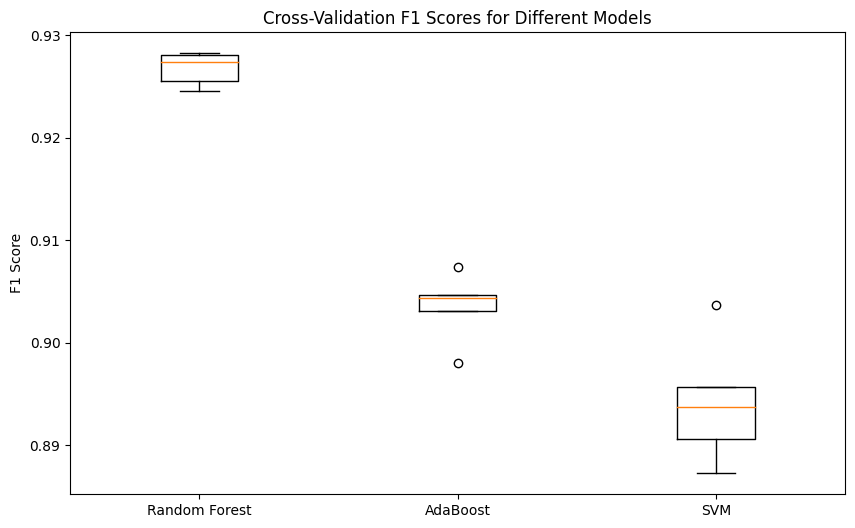

In [444]:
import matplotlib.pyplot as plt

# Cross-validation scores for the three models
models = ['Random Forest', 'AdaBoost', 'SVM']
scores = [f1_cross_val_scores, ada_f1_cross_val_scores, svm_f1_cross_val_scores]

# Plotting the scores
plt.figure(figsize=(10, 6))
plt.boxplot(scores, labels=models)
plt.title('Cross-Validation F1 Scores for Different Models')
plt.ylabel('F1 Score')
plt.show()

In [445]:
rf_pipe.fit(X_train,y_train)
rf_prediction = rf_pipe.predict(X_test)

ada_pipe.fit(X_train,y_train)
ada_prediction = ada_pipe.predict(X_test)

svm_pipe.fit(X_train,y_train)
svm_prediction = svm_pipe.predict(X_test)

In [446]:
rf_f1_score = f1(y_test, rf_prediction)
ada_f1_score = f1(y_test, ada_prediction)
svm_f1_score = f1(y_test, svm_prediction)

print(f"Random Forest F1 Score: {rf_f1_score}")
print(f"AdaBoost F1 Score: {ada_f1_score}")
print(f"SVM F1 Score: {svm_f1_score}")

Random Forest F1 Score: 0.9292610837438424
AdaBoost F1 Score: 0.9094827586206897
SVM F1 Score: 0.9048650778018514
